Modular

In [1]:
import os
import numpy as np
import pandas as pd
import joblib
import tensorflow as tf
import librosa
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

Load all the models

In [2]:
MODEL_DIR = "/Users/js/Desktop/Music Genre Classification/Models/"
DATA_PATH = "/Users/js/Desktop/Music Genre Classification/Data/yamnet_features.csv"

svm_model = joblib.load(os.path.join(MODEL_DIR, "svm_model.pkl"))
cnn_model = tf.keras.models.load_model(os.path.join(MODEL_DIR, "cnn_model.h5"))
lstm_model = tf.keras.models.load_model(os.path.join(MODEL_DIR, "lstm_model.h5"))
transformer_model = tf.keras.models.load_model(os.path.join(MODEL_DIR, "transformer_model.h5"))

2025-02-15 14:23:58.519010: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-02-15 14:23:58.519045: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-02-15 14:23:58.519052: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-02-15 14:23:58.519111: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-02-15 14:23:58.519294: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Data Pre processing

In [3]:
df = pd.read_csv(DATA_PATH)
label_encoder = LabelEncoder()
df["Genre"] = label_encoder.fit_transform(df["Genre"])
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test_r = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

Predictions using models

In [4]:
y_pred_svm = svm_model.predict(X_test)
y_pred_cnn = np.argmax(cnn_model.predict(X_test_r), axis=1)
y_pred_lstm = np.argmax(lstm_model.predict(X_test_r), axis=1)
y_pred_transformer = np.argmax(transformer_model.predict(X_test_r), axis=1)

# Store predictions for comparison
models = {
    "SVM": y_pred_svm,
    "CNN": y_pred_cnn,
    "LSTM": y_pred_lstm,
    "Transformer": y_pred_transformer
}

1/6 [====>.........................] - ETA: 0s

2025-02-15 14:24:06.360946: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 0s 18ms/step


2025-02-15 14:24:07.006298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-02-15 14:24:07.142511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-02-15 14:24:07.155037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/6 [=========>....................] - ETA: 0s

2025-02-15 14:24:07.270406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-02-15 14:24:07.284641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 1s 111ms/step


2025-02-15 14:24:08.018639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 5s 843ms/step


Function to plot confusion matrix

In [5]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

Evaluation of models

SVM Accuracy: 0.8611
Classification Report for SVM:
               precision    recall  f1-score   support

       blues       0.84      0.95      0.89        22
   classical       1.00      1.00      1.00        23
     country       1.00      0.84      0.91        19
       disco       0.71      0.91      0.80        22
      hiphop       0.89      0.89      0.89        18
       metal       0.91      0.77      0.83        13
         pop       0.91      0.80      0.85        25
      reggae       0.85      0.77      0.81        22
        rock       0.71      0.75      0.73        16

    accuracy                           0.86       180
   macro avg       0.87      0.85      0.86       180
weighted avg       0.87      0.86      0.86       180



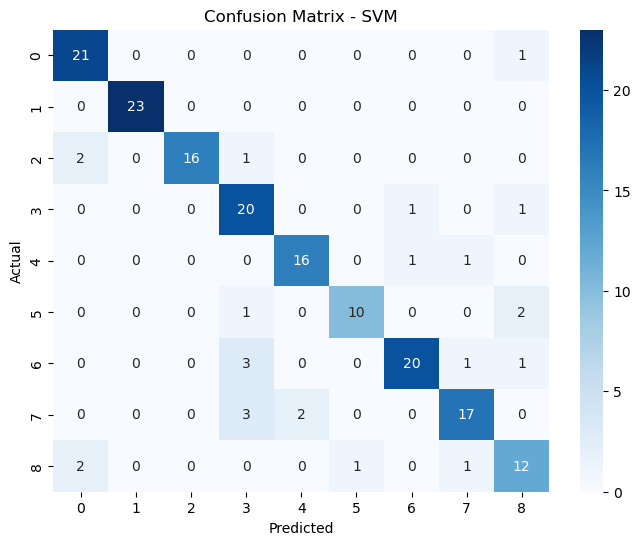

CNN Accuracy: 0.8056
Classification Report for CNN:
               precision    recall  f1-score   support

       blues       0.83      0.91      0.87        22
   classical       1.00      0.96      0.98        23
     country       0.71      0.79      0.75        19
       disco       0.57      0.95      0.71        22
      hiphop       0.93      0.78      0.85        18
       metal       0.80      0.92      0.86        13
         pop       0.88      0.60      0.71        25
      reggae       0.94      0.77      0.85        22
        rock       0.82      0.56      0.67        16

    accuracy                           0.81       180
   macro avg       0.83      0.81      0.81       180
weighted avg       0.84      0.81      0.81       180



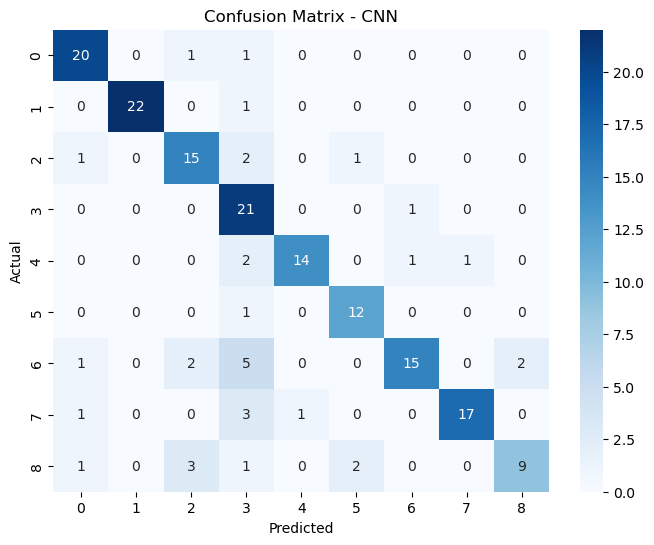

LSTM Accuracy: 0.7167
Classification Report for LSTM:
               precision    recall  f1-score   support

       blues       0.58      0.50      0.54        22
   classical       0.92      0.96      0.94        23
     country       0.67      0.63      0.65        19
       disco       0.74      0.77      0.76        22
      hiphop       0.86      0.67      0.75        18
       metal       0.77      0.77      0.77        13
         pop       0.75      0.72      0.73        25
      reggae       0.74      0.77      0.76        22
        rock       0.45      0.62      0.53        16

    accuracy                           0.72       180
   macro avg       0.72      0.71      0.71       180
weighted avg       0.72      0.72      0.72       180



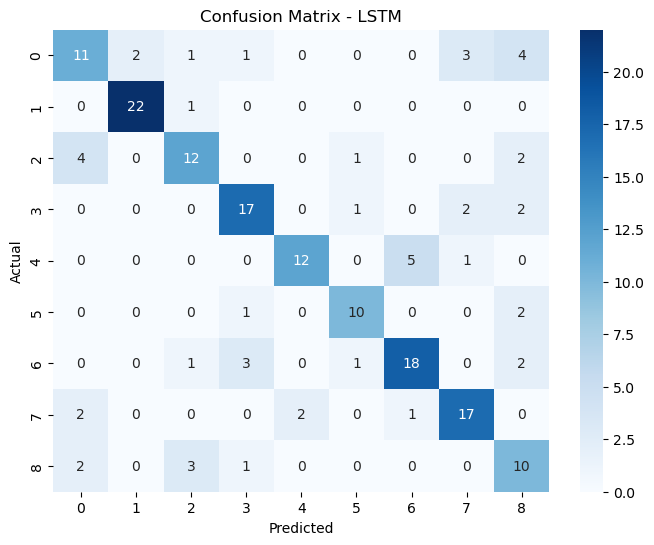

Transformer Accuracy: 0.3333
Classification Report for Transformer:
               precision    recall  f1-score   support

       blues       0.00      0.00      0.00        22
   classical       0.79      0.83      0.81        23
     country       0.46      0.84      0.59        19
       disco       0.20      0.86      0.32        22
      hiphop       0.00      0.00      0.00        18
       metal       0.21      0.31      0.25        13
         pop       0.00      0.00      0.00        25
      reggae       0.00      0.00      0.00        22
        rock       0.50      0.12      0.20        16

    accuracy                           0.33       180
   macro avg       0.24      0.33      0.24       180
weighted avg       0.23      0.33      0.24       180



/Users/js/tensorflow-test/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/js/tensorflow-test/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/js/tensorflow-test/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


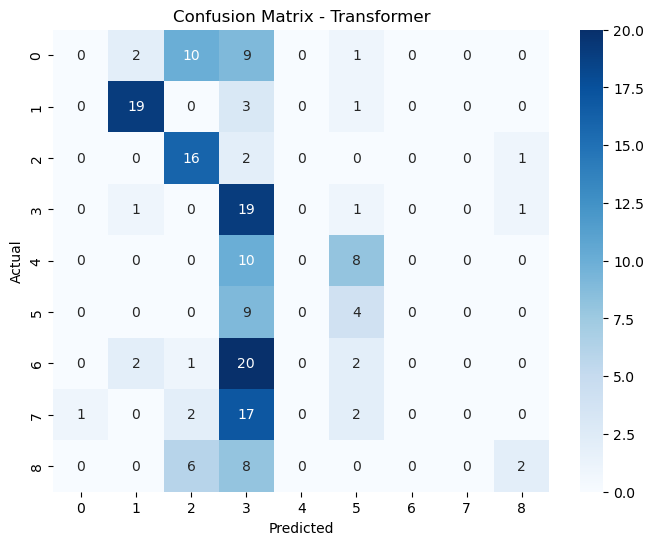

Model evaluation completed!


In [6]:
for model_name, y_pred in models.items():
    y_pred_labels = label_encoder.inverse_transform(y_pred) 
    y_test_labels = label_encoder.inverse_transform(y_test) 

    acc = accuracy_score(y_test_labels, y_pred_labels)
    print(f"{model_name} Accuracy: {acc:.4f}")
    print(f"Classification Report for {model_name}:\n", classification_report(y_test_labels, y_pred_labels))
    plot_confusion_matrix(y_test_labels, y_pred_labels, f"Confusion Matrix - {model_name}")

print("Model evaluation completed!")

Testing model prediction using a test music

In [7]:
# Load YAMNet for feature extraction
yamnet_model = hub.load('https://tfhub.dev/google/yamnet/1')

# Function to extract YAMNet features
def extract_yamnet_features(audio_path):
    try:
        audio, sr = librosa.load(audio_path, sr=16000, mono=True)
        waveform = audio.astype(np.float32)
        scores, embeddings, _ = yamnet_model(waveform)
        return np.mean(embeddings.numpy(), axis=0)  # Use mean embedding
    except Exception as e:
        print(f"Error processing {audio_path}: {e}")
        return None

# Function to predict genre from an uploaded file
def predict_audio_file(audio_path, models, scaler, label_encoder):
    features = extract_yamnet_features(audio_path)
    if features is None:
        print("Error processing audio file.")
        return
    
    # Normalize features
    features = scaler.transform([features])

    # Get predictions
    svm_pred = svm_model.predict(features)
    cnn_pred = np.argmax(cnn_model.predict(features.reshape(1, -1, 1)), axis=1)
    lstm_pred = np.argmax(lstm_model.predict(features.reshape(1, -1, 1)), axis=1)
    transformer_pred = np.argmax(transformer_model.predict(features.reshape(1, -1, 1)), axis=1)

    # Convert predictions back to genre labels
    predictions = {
        "SVM": label_encoder.inverse_transform(svm_pred)[0],
        "CNN": label_encoder.inverse_transform(cnn_pred)[0],
        "LSTM": label_encoder.inverse_transform(lstm_pred)[0],
        "Transformer": label_encoder.inverse_transform(transformer_pred)[0]
    }

    print("Predictions for uploaded file:")
    for model, genre in predictions.items():
        print(f"{model}: {genre}")


In [8]:
predict_audio_file("/Users/js/Desktop/Music Genre Classification/Data/test_music(hiphop).wav", models, scaler, label_encoder)


2025-02-15 14:24:47.959249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 120ms/step
Predictions for uploaded file:
SVM: hiphop
CNN: pop
LSTM: classical
Transformer: classical


From above we can conclude that SVM trained on Yamnet feature extraction worked best.